# Homework 1 - Basic practice in Jupyter and GitHub.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

### Academic honesty statement

**Madison Butler**

Place your academic honesty statement below. Here are some acceptable examples.

-   I completed all these problems on my own.




# Problem 1: Gas Laws



The virial equation for a gas can be represented as $\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ where $V$ is the molar volume.

For isopropanol $B=-388 cm^3/mol$ and $C=-26,000 cm^6/mol^2$.

We are going to find $V$ for isopropanol at 200 ∘C and 10 bar with a graphical technique.

In this problem $R=83.14 cm^3 bar / (mol K)$.



### Compute V for an ideal gas



The ideal gas law is $1 = \frac{PV}{RT}$. Use this to estimate the volume of isopropanol in the ideal gas state. Print your answer with one decimal place and the printed answer **must include units.**



In [3]:
P = 10;
R = 83.14;
T = 200+273;
V= (R*T)/P;
print(round(V,1),"cm\u00b3");

3932.5 cm³


### Compute V for the Virial Gas Law



To do this, create a new function:

$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

and then find values of $V$ where $f(V) = 0$. Start by defining this function and test that it works.Show that your function works by evaluating it for some examples, including an array of volumes.



In [67]:
#need a solver function and numpy for quick arrays

from scipy.optimize import fsolve
import numpy as np

#need the function defined

def virial(V):
    P=10
    R=83.14
    T=200+273
    B=-388
    C=-26000
    func = (P*V)/(R*T)-1-(B/V)-(C/(V**2))
    return func

#lets throw a volume at it
print(virial(5))

#lets try some values of V from an array
print(virial(np.linspace(1,1000,5)))

#lets try and find some solutions where f(V) = 0
root = fsolve(virial,1)
print(root)

#trial and error to find more solutions the starting estimate matters a lot
root = fsolve(virial,5000)
print(root)

1116.601271448704
[ 2.63870003e+04  1.02463627e+00  6.28910207e-03 -2.45866753e-01
 -3.31710259e-01]
[504.21392261]
[3486.47065713]


### Plot f(V) over a range where you can observe a zero



You should make the x-axis sufficiently zoomed in to estimate the solution to about 10 cm<sup>3</sup>.



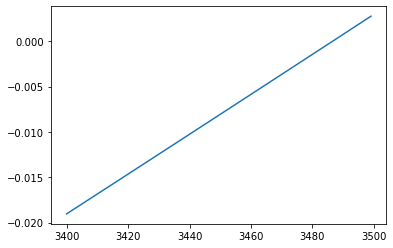

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def virial(V):
    P=10
    R=83.14
    T=200+273
    B=-388
    C=-26000
    func = (P*V)/(R*T)-1-(B/V)-(C/(V**2))
    return func

#lets set the domain

#domain for solution 1
domain = np.arange(450,550)

#domain for solution 2
domain = np.arange(3400,3500)

#and the resulting array of V values

varray = virial(domain)

#now lets plot

plt.plot(domain,varray)
plt.show()

State in words where the solution(s) are.

Hmmmm. In words. Approximately five hundred centimeters cubed? There is another solution around three thousand four hundred and eighty centimeters cubed.



### Express this in the form of a cubic polynomial in $V$



Derive an alternative expression for f(V) where it is a cubic polynomial of the form $0 = a V^3 + b V^2 + c V + d$. Write this expression in LaTeX, with explicit definitions for the coefficients.



$$0 = \frac{P}{RT}V^3-V^2-BV-C$$

Where $P$ is pressure in $Bar$, $R$ is the gas constant in $\frac{cm^3Bar}{molK}$, $T$ is the temperature in $K$, B is in $\frac{cm^3}{mol}$, and C is in $\frac{cm^6}{mol^2}$

# Problem 2: Running and plotting an ODE

Most programming is repeative. Once you learn how to run an ODE solver, running it again in the future involves just editing prior code. We discussed the Lorenz equations in class, now we'll run them ourselves. The equations are as follows: 

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

These equations are to describe a 2 dimensional layer of fluid that is heat from below and cooled from above. The derivation of these equations is beyond our interest here but can be found easily online. We want to focus on how to simulate such equations.

In the above, x is proportional to the intensity of the convective motion, while y is proportional to the temperature difference between the ascending and descending currents, similar signs of x and y denoting that warm fluid is rising and cold fluid is descending. The variable z is proportional to the distortion of vertical temperature profile from linearity, a positive value indicating that the strongest gradients occur near the boundaries.

Let the parameters be
\begin{align}
\sigma =10\\
\beta =8/3\\
\rho =28\\
\end{align}

We will ignore units for this problem.

In the space below, 
1. Simulate this system with initial conditions of x = y = z = 1. Simulate out to time 1000 and take 0.1 time unit step sizes. Save the necessary results in a matrix.


In [9]:
from scipy.integrate import odeint
import numpy as np

#let's establish the domain
t = np.arange(0,1000,.1)

#given parameters & initial conditions
sigma = 10
beta = 8/3
rho = 28
sys0 = [1, 1, 1]

#defining the system of equations
def func(sys, t):
    x, y, z = sys
    dx = sigma*(y-x)
    dy = rho*x - y - x*z
    dz = -beta*z + x*y
    return(dx,dy,dz)

#let's try odeint
sol = odeint(func, sys0, t)

2. Simulate the system again but with x = y = 1 and z = 0.9999 (precisely). Save the necessary results in a matrix.

In [10]:
from scipy.integrate import odeint
import numpy as np

t = np.arange(0,1000,.1)

sigma = 10
beta = 8/3
rho = 28
sys0_1 = [1, 1, 1]
sys0_2 = [1, 1, .9999]

def func(sys, t):
    x, y, z = sys
    dx = sigma*(y-x)
    dy = rho*x - y - x*z
    dz = -beta*z + x*y
    return(dx,dy,dz)

#two solutions this time
sol1 = odeint(func, sys0_1, t)
sol2 = odeint(func, sys0_2, t)

3. On a single plot, plot x vs y from 1 and 2 above. Be sure to label axes.

Text(0, 0.5, 'y')

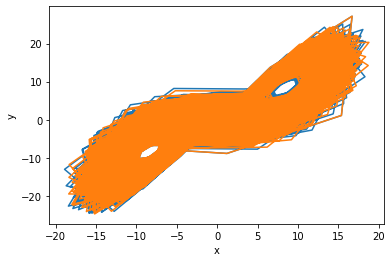

In [11]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,1000,.1)

sigma = 10
beta = 8/3
rho = 28
sys0_1 = [1, 1, 1]
sys0_2 = [1, 1, .9999]

def func(sys, t):
    x, y, z = sys
    dx = sigma*(y-x)
    dy = rho*x - y - x*z
    dz = -beta*z + x*y
    return(dx,dy,dz)

sol1 = odeint(func, sys0_1, t)
sol2 = odeint(func, sys0_2, t)

#Plotting two solutions

plt.plot(sol1[:, 0],sol1[:, 1], label='Solution 1')
plt.plot(sol2[:, 0],sol2[:, 1], label='Solution 2')
plt.xlabel("x")
plt.ylabel("y")


4. On a single plot, plot x vs z from 1 and 2 above. Be sure to label axes.

Text(0, 0.5, 'z')

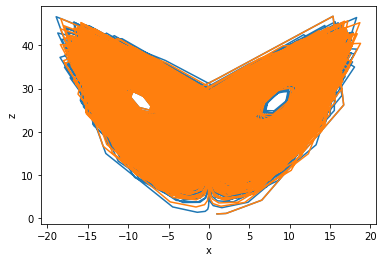

In [12]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,1000,.1)

sigma = 10
beta = 8/3
rho = 28
sys0_1 = [1, 1, 1]
sys0_2 = [1, 1, .9999]

def func(sys, t):
    x, y, z = sys
    dx = sigma*(y-x)
    dy = rho*x - y - x*z
    dz = -beta*z + x*y
    return(dx,dy,dz)

sol1 = odeint(func, sys0_1, t)
sol2 = odeint(func, sys0_2, t)

#Plotting two solutions

plt.plot(sol1[:, 0],sol1[:, 2], label='Solution 1')
plt.plot(sol2[:, 0],sol2[:, 2], label='Solution 2')
plt.xlabel("x")
plt.ylabel("z")

5. On a single plot, plot x vs time from 1 and 2 above. Be sure to label.

Text(0, 0.5, 'x')

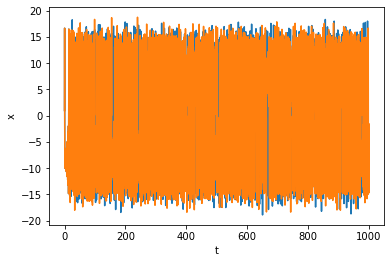

In [13]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,1000,.1)

sigma = 10
beta = 8/3
rho = 28
sys0_1 = [1, 1, 1]
sys0_2 = [1, 1, .9999]

def func(sys, t):
    x, y, z = sys
    dx = sigma*(y-x)
    dy = rho*x - y - x*z
    dz = -beta*z + x*y
    return(dx,dy,dz)

sol1 = odeint(func, sys0_1, t)
sol2 = odeint(func, sys0_2, t)

#Plotting two solutions

plt.plot(t,sol1[:, 0], label='Solution 1')
plt.plot(t,sol2[:, 0], label='Solution 2')
plt.xlabel("t")
plt.ylabel("x")


6. After completing all simulations, comment on how changing the initial value of z by 0.01% impacted the simulation outcomes. Be sure to use a Markdown cell for this.

**Write your answer here.**

There was a significant difference in that every value for t, x, y or z is different. There are dramatic differences, and smaller differences, but it is clear that it would be unlikely for the values to ever be the same across solutions. However, the same patterns can be observed.

# Problem 3 - Reading COVID data and Prediction

I hope I mentioned in class that when it comes to addressing engineering questions computationally, you will often be expected to learn on your own. This means using google or what have you and searching for specific libraries that can help solve the problem at hand. 

Here, I have provided some data that I pulled from the New York Time's GitHub COVID-19 data repository. The file is called florida.csv and contains COVID outbreak data specific to Florida. The data contains: the week since the start of the outbreak, the 7 day sliding average of the number of COVID positive cases and the 7 day sliding average of the number of deaths reported.

In the cell below, write the code necessary to load this data into the workspace and give the resulting array the name "dat". The numpy.genfromtxt function may be helpful.

In [14]:
import pandas as pd

dat = pd.read_csv(r"C:\Users\mdsnb\Downloads\florida.csv")

print(dat)

     week  cases_avg  deaths_avg
0       1       0.29        0.00
1       2       0.29        0.00
2       3       0.43        0.00
3       4       0.43        0.00
4       5       0.57        0.00
..    ...        ...         ...
536   537   23792.86      201.29
537   538   21534.29      212.29
538   539   23313.86      212.29
539   540   23313.86      212.29
540   541   21329.14      227.57

[541 rows x 3 columns]


Next, make a points plot with the average number of cases on the x axis and the average number of deaths on the y axis. Have the color of the points change according to the week of the infection. There are a lot of ways to generate such a plot. Consider matlibplot and ggplot2. After plotting, create a markdown cell and comment on the how these two features have evolved in time.

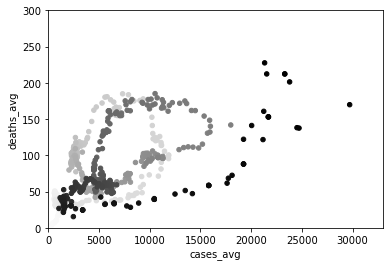

In [15]:
import pandas as pd

dat = pd.read_csv(r"C:\Users\mdsnb\Downloads\florida.csv")
dat.plot(x='cases_avg',y='deaths_avg', kind='scatter', xlim=[0,33000], ylim=[0,300], c = dat['week'])

plt.show()

**Put Commentary here:**

There seems to be a pattern over time of increasing cases yielding increasing deaths, yielding decreasing cases yielding decreasing deaths, cycling back again to increasing cases. However there is a fair amount of noise in the data. Most obviously, in the latter part of the data the deaths and cases are very high, and very chaotic. The data also can be said to generally follow a "path," if a noisy one. This path snakes out from low case and death numbers to much higher numbers, although taking a literally circuitous route.

One goal of every scientist should be to use data for predictions. Here, we'll use this goal as a chance to practice for loops. 

Ideally, in a world without delays and nonlinearities, the best way to predict an outcome is with a linear model, aka a straight line. Right a "for loop" which adds 4 straight lines to our plot of average infection and average mortality. Each line should have an intercept at zero and a slope of 0.001, 0.01, 0.1 and 1. 

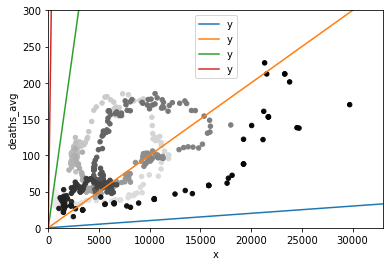

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dat = pd.read_csv(r"C:\Users\mdsnb\Downloads\florida.csv")
ax = dat.plot(x='cases_avg',y='deaths_avg', kind='scatter', xlim=[0,33000], ylim=[0,300], c = dat['week'])

for z in range(4):
    d = {'x': [0, 100000], 'y': [0, 100000*(10**(z-3))]}
    df = pd.DataFrame(data=d)
    df.plot('x','y', kind='line', ax=ax)

Using just your eyes, which straight line seems to best fit the data? What does best fit mean? 

The straight line with a slope of .01 seems to have the best fit for the data. Best fit typically refers to the sum of squares created in between the line of best fit and each data point to be minimized, reducing the "error."

# Problem 4 Github

- Create a github repository called "Che_Math".
- Create a read me file that explain that this repository will include code related to homeworks and projects from this course.
- Push this homework assignment to your repository.
- Enter the link you your repository here:


**Upload your jupyter notebook to Canvas for grading. Thank you!

https://github.com/mdsnbutler/ChE_2410_Math